In [4]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import yaml

FONT_SIZE = 15

plt.rc('font', size=FONT_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=FONT_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=FONT_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=FONT_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=FONT_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=FONT_SIZE)    # legend fontsize
plt.rc('figure', titlesize=FONT_SIZE)  # fontsize of the figure title
matplotlib.rc('lines', linewidth=3)

In [7]:
fields = ['type', 'i1', 'i2', 'i3', 'i4', 'i0']

In [56]:
! ls ../

algorithm_params.yaml		    lr_belady.log
archieve			    lr_belady_out_sample.log
belady.log			    lr_diverge.log
build				    lr.log
CMakeLists.txt			    lruk.log
CONTRIBUTING			    lruksample32.log
include				    lru.log
integration			    notebook
intervals_lr_belady_0.8_big_msr.lo  pywebcachesim
intervals_lr_belady_0.8_cdnhk.lo    pywebcachesim.egg-info
intervals_lr_belady_0.8_cdnus.lo    README.md
intervals_lr_belady.log		    requirements.txt
intervals_lr.log		    sample_belady.log
job				    setup.py
lfo2.log			    snapshot.log
lib				    src
LICENSE				    test
log				    tmp
lr_belady_in_cache.log		    trace


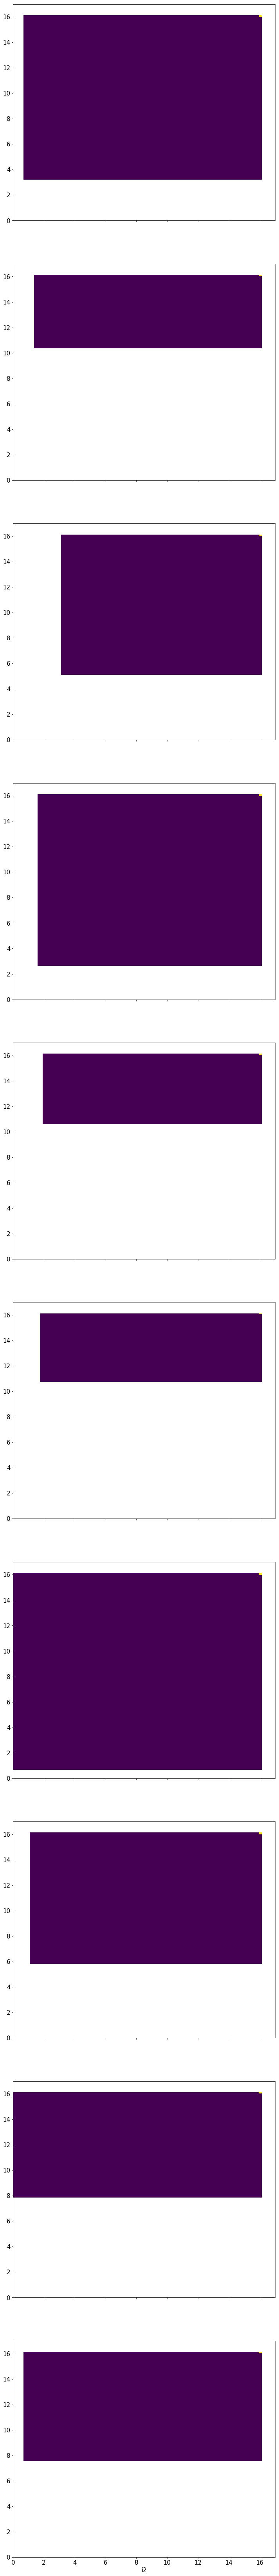

In [59]:
# field distribution
observations = np.linspace(0, 60e6, 10, dtype=int)

n_observations = len(observations)

fig, axes = plt.subplots(nrows=len(observations), sharex=True, figsize=(12,12*len(observations)))

for i, o in enumerate(observations):
    df = pd.read_csv('../intervals_lr_belady_0.8_big_msr.lo', delimiter=' ', names=fields, nrows=1000000, skiprows=o)
    df_training_belady = df[df.type == 0]
    axes[i].hist2d(df_training_belady['i1'].values, df_training_belady['i2'].values, label='belady', bins=[100, 100])
    axes[i].set_xlim([0, 17])
    axes[i].set_ylim([0, 17])
# plt.title('In-cache distribution for Belady and LR')
plt.xlabel('i1')
plt.xlabel('i2')
plt.show()

In [79]:
! wc -l ../intervals_lr_belady.log

127820481 ../intervals_lr_belady.log


In [80]:
df = pd.read_csv('../intervals_lr_belady.log', delimiter=' ', names=fields, nrows=1000000, skiprows=int(50e6))
#df_training_belady = df[df.type == 0]

In [95]:
df_snapshot = df[df.type != 2].copy()

In [96]:
df_snapshot.loc[:, 'class'] = np.exp(df_snapshot.i1)//1000000

In [98]:
df_snapshot['class'].drop_duplicates()

0          0.0
9          1.0
34         9.0
35         3.0
38         4.0
39         2.0
46         7.0
56         8.0
63         6.0
176        5.0
197291    10.0
Name: class, dtype: float64

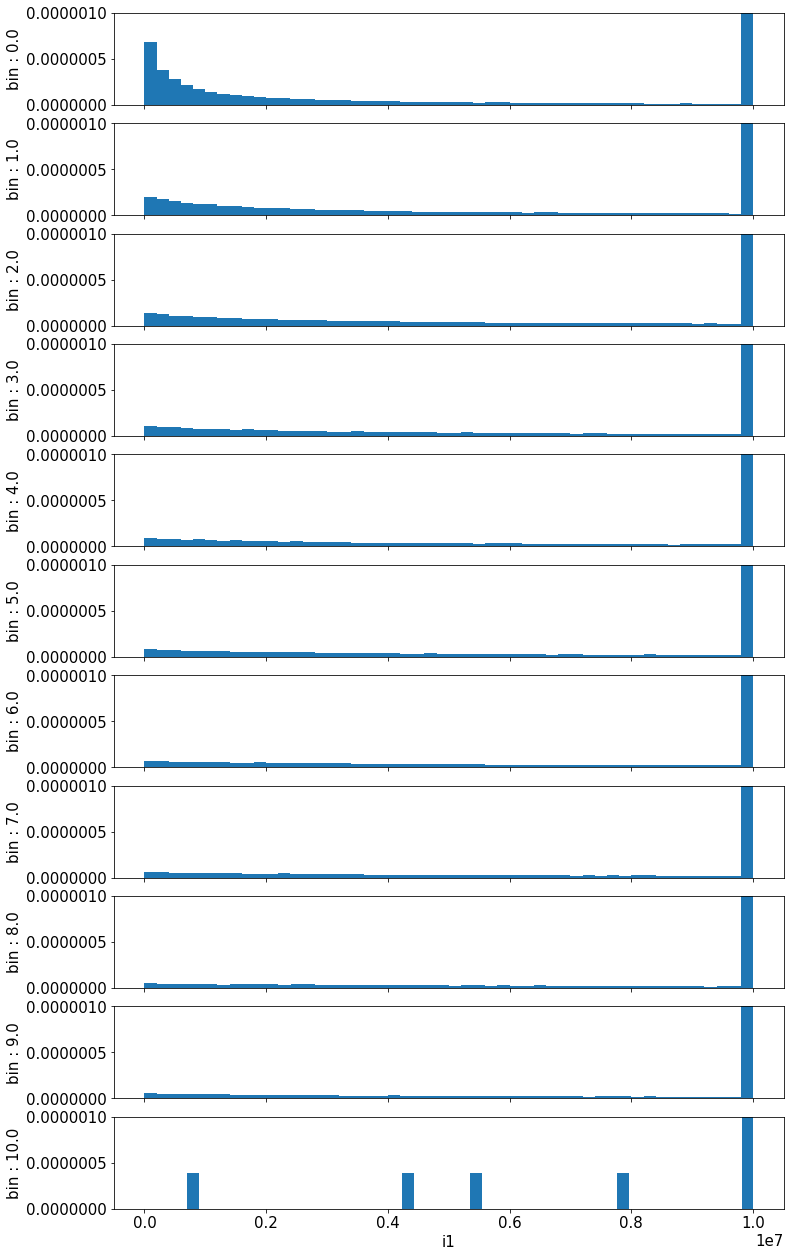

In [100]:
fig, axes = plt.subplots(sharex=True, sharey=True, nrows=len(df_snapshot['class'].drop_duplicates()),
                         figsize=(12, 2*len(df_snapshot['class'].drop_duplicates())))
for i, (idx, grp) in enumerate(df_snapshot.groupby('class')):
    axes[i].hist(np.exp(grp.i0), density=True, bins=50)
    axes[i].set_ylabel(f'bin : {idx}')
plt.xlabel('i1')
plt.ylim([0, 0.000001])
plt.show()

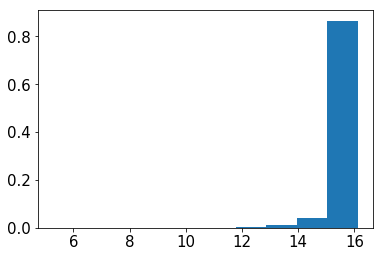

In [92]:
plt.hist(df_trace.i4, density=1)
plt.show()

(array([1.00000e+00, 0.00000e+00, 4.00000e+00, 4.00000e+00, 8.00000e+00,
        1.00000e+01, 4.60000e+01, 1.94000e+02, 9.79000e+02, 4.97112e+05]),
 array([ 0.693147 ,  2.2356423,  3.7781376,  5.3206329,  6.8631282,
         8.4056235,  9.9481188, 11.4906141, 13.0331094, 14.5756047,
        16.1181   ]),
 <a list of 10 Patch objects>)

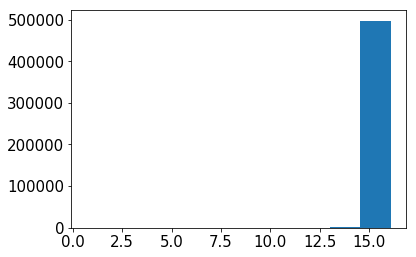

In [64]:
plt.hist(df[df.type==0].i1)

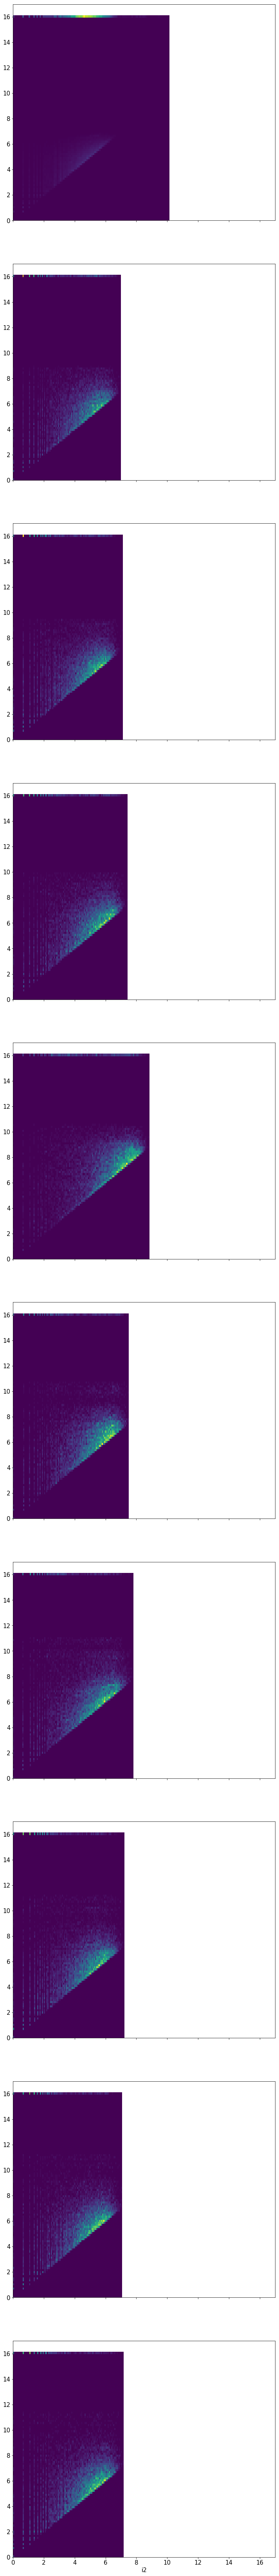

In [66]:
# field distribution
observations = np.linspace(0, 60e6, 10, dtype=int)

n_observations = len(observations)

fig, axes = plt.subplots(nrows=len(observations), sharex=True, figsize=(12,12*len(observations)))

for i, o in enumerate(observations):
    df = pd.read_csv('../intervals_lr_belady_0.8_cdnus.lo', delimiter=' ', names=fields, nrows=1000000, skiprows=o)
    df_training_belady = df[df.type == 0]
    axes[i].hist2d(df_training_belady['i1'].values, df_training_belady['i2'].values, label='belady', bins=[100, 100])
    axes[i].set_xlim([0, 17])
    axes[i].set_ylim([0, 17])
# plt.title('In-cache distribution for Belady and LR')
plt.xlabel('i1')
plt.xlabel('i2')
plt.show()

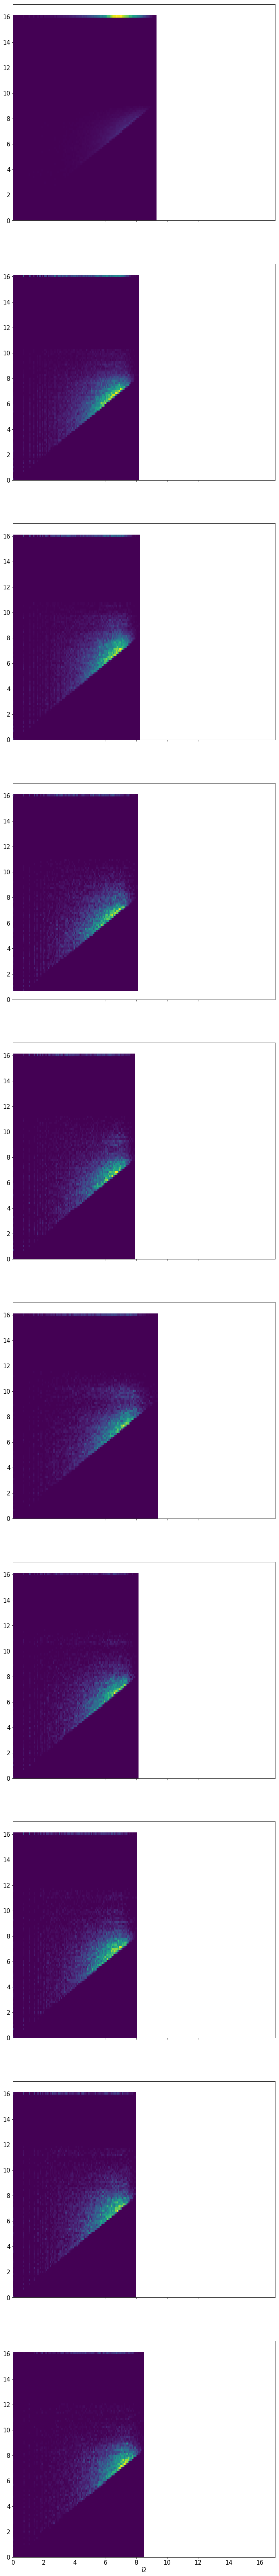

In [57]:
# field distribution
observations = np.linspace(0, 60e6, 10, dtype=int)

n_observations = len(observations)

fig, axes = plt.subplots(nrows=len(observations), sharex=True, figsize=(12,12*len(observations)))

for i, o in enumerate(observations):
    df = pd.read_csv('../intervals_lr_belady_0.8_cdnhk.lo', delimiter=' ', names=fields, nrows=1000000, skiprows=o)
    df_training_belady = df[df.type == 0]
    axes[i].hist2d(df_training_belady['i1'].values, df_training_belady['i2'].values, label='belady', bins=[100, 100])
    axes[i].set_xlim([0, 17])
    axes[i].set_ylim([0, 17])
# plt.title('In-cache distribution for Belady and LR')
plt.xlabel('i1')
plt.xlabel('i2')
plt.show()

In [73]:
df = pd.read_csv('../intervals_lr_belady.log', delimiter=' ', names=fields, nrows=1000000, skiprows=int(80e6))
df_training_belady = df[df.type == 0]

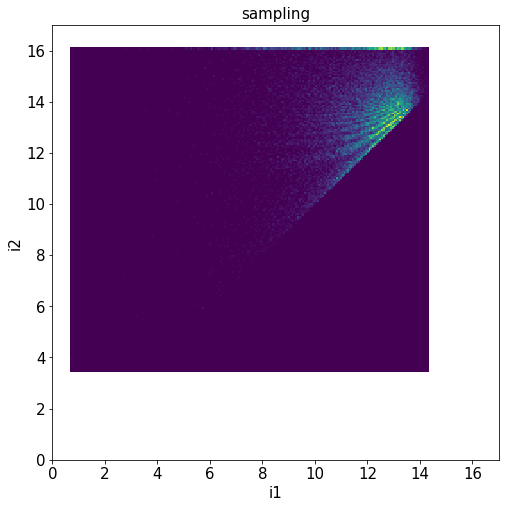

In [74]:
fig, ax = plt.subplots(figsize=(8,8))
plt.hist2d(df_training_belady['i1'].values, df_training_belady['i2'].values, label='belady', bins=[200, 200])
plt.xlim([0, 17])
plt.ylim([0, 17])
plt.xlabel('i1')
plt.ylabel('i2')
plt.title('sampling')
plt.show()

(array([2.0000e+00, 6.0000e+00, 2.2000e+01, 9.2000e+01, 3.0700e+02,
        1.0510e+03, 3.7230e+03, 1.0548e+04, 1.0174e+04, 5.0970e+03]),
 array([ 3.46574 ,  4.730976,  5.996212,  7.261448,  8.526684,  9.79192 ,
        11.057156, 12.322392, 13.587628, 14.852864, 16.1181  ]),
 <a list of 10 Patch objects>)

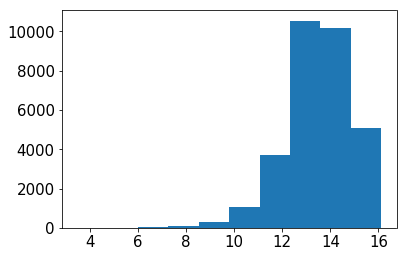

In [75]:
plt.hist(df_training_belady['i2'].values)

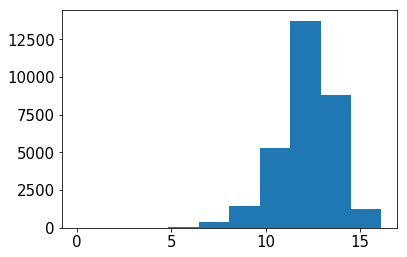

In [77]:
plt.hist(df_training_belady['i0'].values)
plt.show()

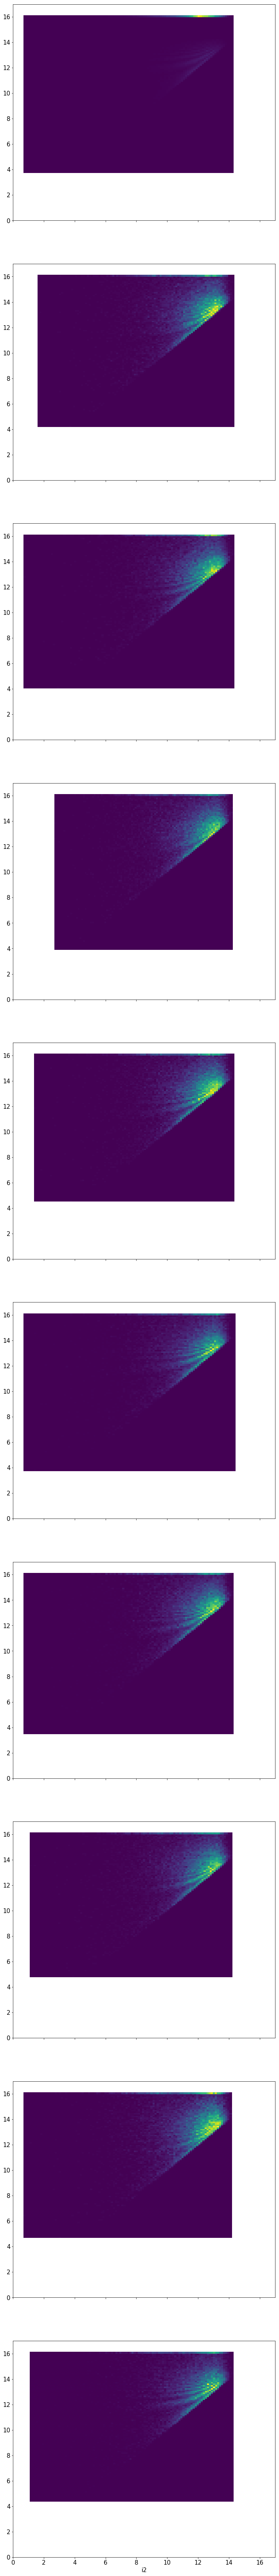

In [55]:
# field distribution
observations = [0, int(10e6), int(20e6), int(40e6), int(80e6), int(100e6)]
observations = np.linspace(0, 120e6, 10, dtype=int)

n_observations = len(observations)

fig, axes = plt.subplots(nrows=len(observations), sharex=True, figsize=(12,12*len(observations)))

for i, o in enumerate(observations):
    df = pd.read_csv('../intervals_lr_belady.log', delimiter=' ', names=fields, nrows=1000000, skiprows=o)
    df_training_belady = df[df.type == 0]
    axes[i].hist2d(df_training_belady['i1'].values, df_training_belady['i2'].values, label='belady', bins=[100, 100])
    axes[i].set_xlim([0, 17])
    axes[i].set_ylim([0, 17])
# plt.title('In-cache distribution for Belady and LR')
plt.xlabel('i1')
plt.xlabel('i2')
plt.show()

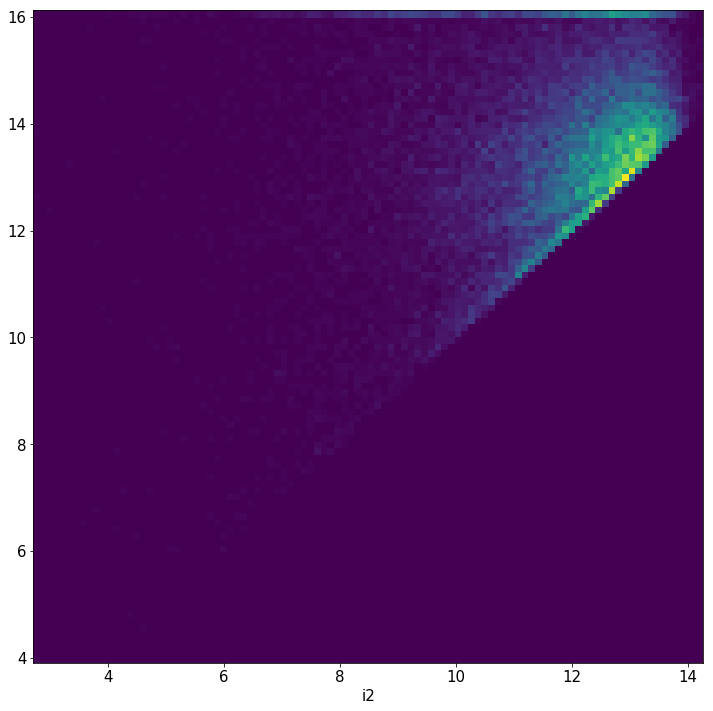

In [32]:
fig, axes = plt.subplots(figsize=(12, 12))
plt.hist2d(df_training_belady['i1'].values, df_training_belady['i2'].values, label='belady', bins=[100, 100])
plt.xlabel('i1')
plt.xlabel('i2')
plt.show()

In [34]:
diff = np.exp(df_training_belady['i2'].values) - np.exp(df_training_belady['i1'].values)

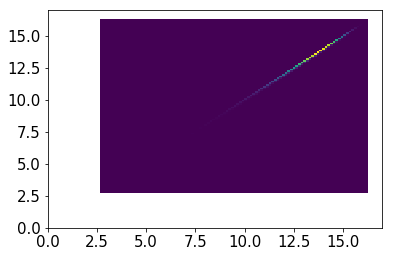

In [37]:
x = np.random.exponential(scale=1e6, size=100000)
y1 = x+1
y = y1

plt.hist2d(np.log1p(x), np.log1p(y), bins=[100, 100])
plt.xlim(0, 17)
plt.ylim(0, 17)
plt.show()

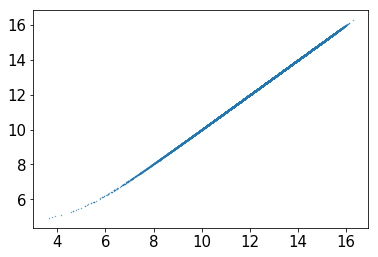

In [36]:
plt.scatter(np.log1p(x), np.log1p(x+100), s=0.1)
plt.show()

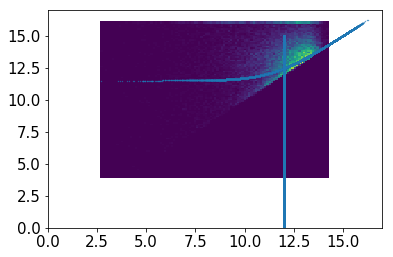

In [38]:
xs = df_training_belady['i1'].values#[df_training_belady['i1'] <= 12].values
ys = df_training_belady['i2'].values#[df_training_belady['i1'] <= 12].values
plt.hist2d(xs, ys, label='belady', bins=[100, 100])
plt.xlim(0, 17)
plt.ylim(0, 17)
plt.scatter(np.log1p(x), np.log1p(x+100000), s=0.1)
plt.plot([12,12],[0, 15])
plt.show()

In [39]:
diff = np.exp(ys) - np.exp(xs)

In [21]:
np.exp(df_training_belady.i0.max())

10000043.490511356

In [40]:
len(diff)

31126

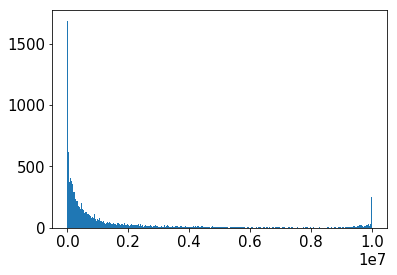

In [41]:
a, b, _ = plt.hist(diff, bins=1000)
plt.show()

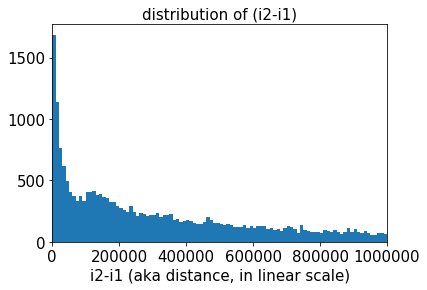

In [42]:
a, b, _ = plt.hist(diff, bins=1000)
plt.xlim([0e6, 1e6])
plt.title('distribution of (i2-i1)')
plt.xlabel('i2-i1 (aka distance, in linear scale)')
plt.show()

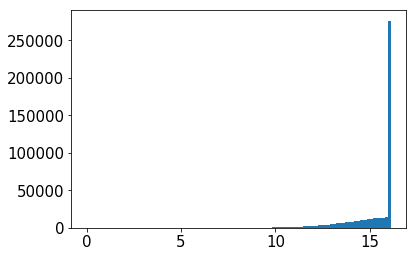

In [27]:
plt.hist(df_training_belady[df_training_belady.type != 2].i0.values, bins=100)
plt.show()